<a href="https://colab.research.google.com/github/romanfen/F21DL-G6/blob/main/Lab11_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up and Imports

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
# stratificiation set up
from sklearn.model_selection import StratifiedShuffleSplit

# Import Smile Data

In [29]:
X = np.load('/content/drive/MyDrive/Colab Notebooks/smiley_X.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/smiley_y.npy')

In [32]:
class_names = ['smile','frown']

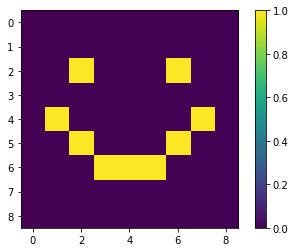

In [30]:
plt.figure()
plt.imshow(X[0].squeeze())    # data is actually a 3d array, squeeze slices it into a 2d for imaging
plt.colorbar()
plt.grid(False)
plt.show()

In [36]:
y[0]

0.0

# Training and Test Sets

In [42]:
X.shape, y.shape

((144, 9, 9, 1), (144,))

Split data 80% train and 20% test

In [44]:
x_train, x_test, y_train, y_test = X[:114], X[114:], y[:114], y[114:]
x_train.shape

(114, 9, 9, 1)

# Visualise Data

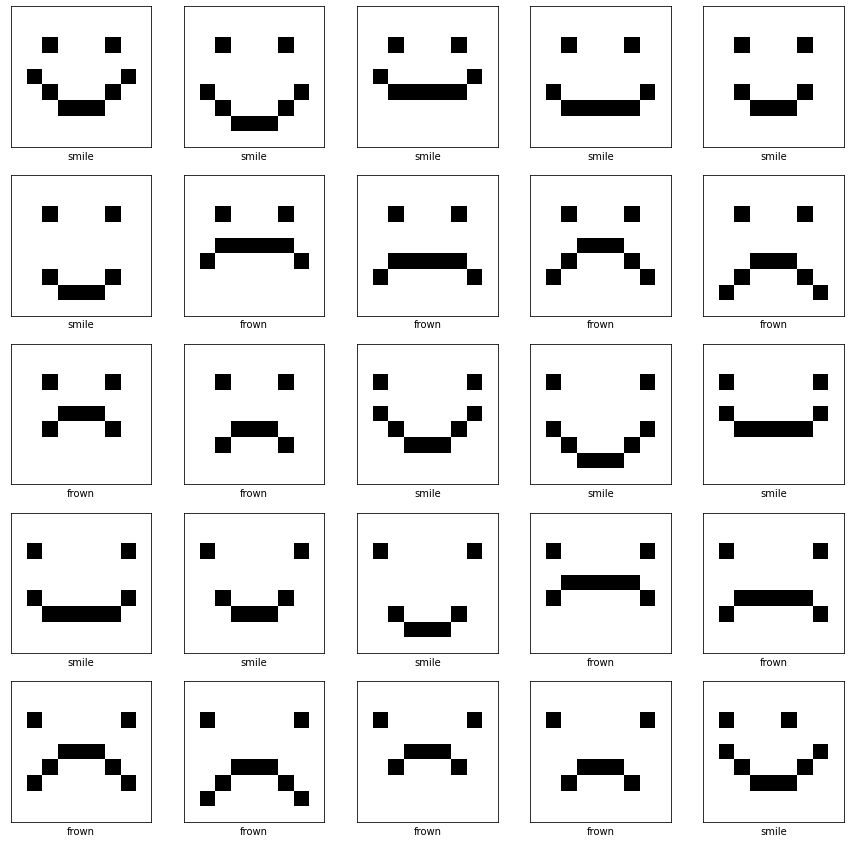

In [47]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [48]:
x_train.shape

(114, 9, 9, 1)

# ANN Model

## Building Model

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(9, 9)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training Model

In [51]:
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 4ms/step - loss: 2.2252 - accuracy: 0.1053
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 1.9572 - accuracy: 0.5088
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 1.7015 - accuracy: 0.8772
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 1.4560 - accuracy: 0.9035
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 1.2245 - accuracy: 0.9123
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 1.0108 - accuracy: 0.9211
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.8215 - accuracy: 0.9386
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.9737
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.9912
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 1.0000


## Evaluating Model

In [99]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=1)
print('\nTest accuracy:', test_acc)

1/1 [==============================] - 0s 21ms/step - loss: 0.4381 - accuracy: 0.9333

Test accuracy: 0.9333333373069763


## Prediction

In [56]:
classifications = model.predict(x_test)

1/1 [==============================] - 0s 160ms/step


In [57]:
print(classifications[3])

[0.22443652 0.6674816  0.00851201 0.01441184 0.00826027 0.01503724
 0.01508667 0.00785181 0.0136013  0.0253208 ]


In [58]:
np.argmax(classifications[3])

1

In [60]:
np.max(classifications[3])

0.6674816

In [59]:
class_names[np.argmax(classifications[3])]

'frown'

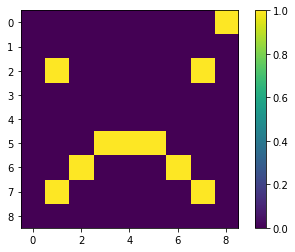

In [62]:
plt.imshow(x_test[3].squeeze())
plt.colorbar()
plt.grid(False)

In [69]:
def plot_value_array(i, predictions_array, true_label):
    
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[int(true_label)].set_color('blue')

In [70]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[int(true_label)]),
                                color=color)

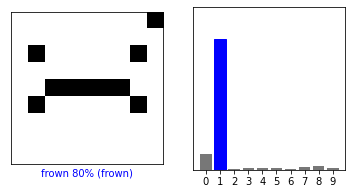

In [71]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], y_test.squeeze(), x_test.squeeze())
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  y_test)
plt.show()

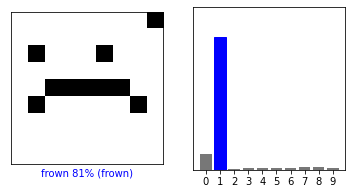

In [73]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], y_test.squeeze(), x_test.squeeze())
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  y_test)
plt.show()

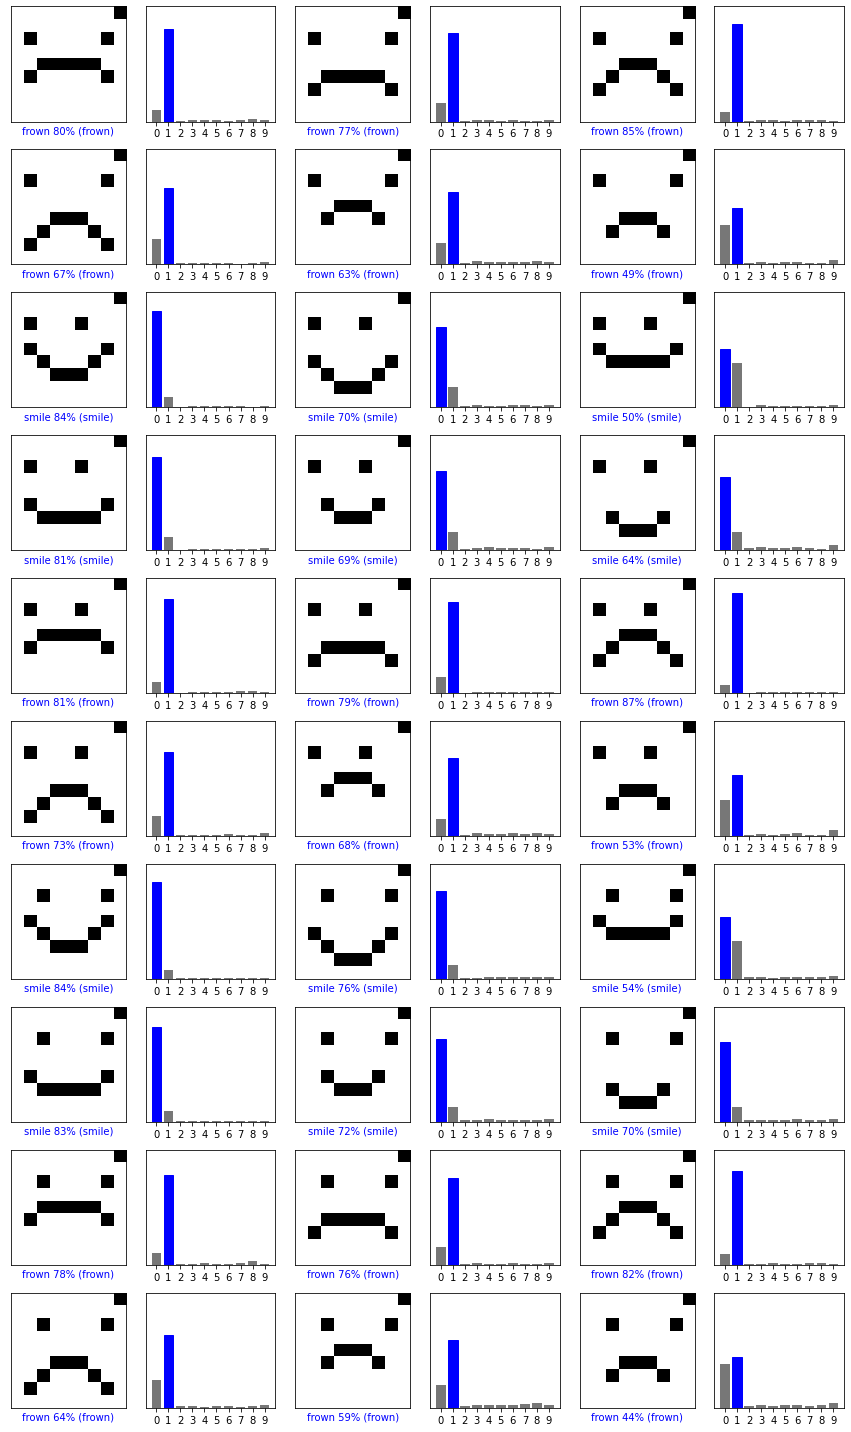

In [78]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, classifications[i], y_test.squeeze(), x_test.squeeze())
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, classifications[i], y_test.squeeze())
plt.tight_layout()
plt.show()

# CNN Model

## Building Model

In [92]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(9, 9, 1)),
  tf.keras.layers.MaxPooling2D((2,2), padding='same'),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 7, 7, 64)          640       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 2, 2, 64)          36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 128)             

## Training Model

In [93]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
4/4 [==============================] - 1s 8ms/step - loss: 2.2270 - accuracy: 0.1316
Epoch 2/5
4/4 [==============================] - 0s 8ms/step - loss: 1.9576 - accuracy: 0.8421
Epoch 3/5
4/4 [==============================] - 0s 8ms/step - loss: 1.5566 - accuracy: 0.9123
Epoch 4/5
4/4 [==============================] - 0s 8ms/step - loss: 1.0506 - accuracy: 0.9123
Epoch 5/5
4/4 [==============================] - 0s 7ms/step - loss: 0.6157 - accuracy: 0.9561


## Evaluating Model

In [100]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9333333373069763


## Prediction

In [105]:
classifications = model.predict(x_test)
print(classifications[3])

1/1 [==============================] - 0s 19ms/step
[0.32695305 0.6164119  0.00240945 0.00732123 0.01597567 0.00425041
 0.00230616 0.01322034 0.00668338 0.00446822]


In [110]:
class_names[np.argmax(classifications[18])]

'smile'

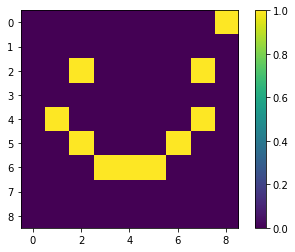

In [111]:
plt.imshow(x_test[18].reshape(9,9))
plt.colorbar()
plt.grid(False)

# Visualise Layers

1/1 [==============================] - 0s 18ms/step


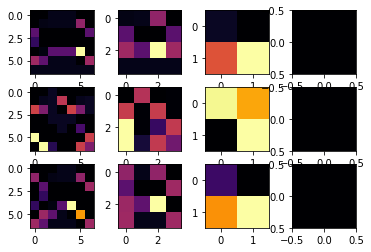

In [113]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

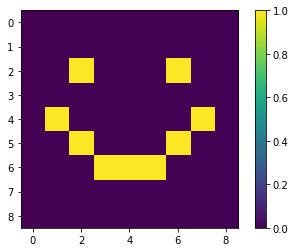

In [114]:
plt.imshow(x_train[FIRST_IMAGE].reshape(9,9))
plt.colorbar()
plt.grid(False)

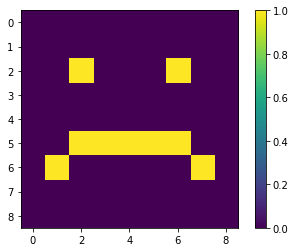

In [115]:
plt.imshow(x_train[SECOND_IMAGE].reshape(9,9))
plt.colorbar()
plt.grid(False)

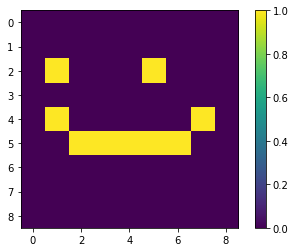

In [116]:
plt.imshow(x_train[THIRD_IMAGE].reshape(9,9))
plt.colorbar()
plt.grid(False)